# Import Library

In [35]:
#Import library
import pandas as pd
import joblib
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input

# Data Prepocessing

In [36]:
# Load Data
url = "https://raw.githubusercontent.com/RyanRizaldy/StuntTrack/main/capstoneProject/ML/dataset/data_balita_balanced.csv"
dataset= pd.read_csv(url)
dataset

,Umur,Jenis_Kelamin,Tinggi_Badan,Status_Gizi
0,0,1,47.598436,2
1,40,0,99.900000,2
2,57,1,107.300000,2
3,58,0,110.300000,2
4,25,0,83.400000,2
...,...,...,...,...
22323,60,0,92.700000,0
22324,60,0,92.300000,0
22325,60,0,95.200000,1
22326,60,0,126.200000,3


In [37]:
# Separate features (X) and target (y)
X = dataset[['Umur', 'Jenis_Kelamin', 'Tinggi_Badan']]
y = dataset['Status_Gizi']

In [38]:
# Feature Scaling using Min-Max Normalization
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
# Saving the Scaler Object
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [40]:
# Splitting the Dataset into Training, Validation, and Testing Sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Modeling

In [41]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),  
    Dense(16, activation='relu'),     
    Dense(16, activation='relu'),    
    Dense(4, activation='softmax')    
])

In [42]:
# Model Compilation
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Set Up Callbacks

In [43]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the Model

In [44]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stopping],
                    verbose=1)


Epoch 1/100
559/559 ━━━━━━━━━━━━━━━━━━━━ 1s 564us/step - accuracy: 0.4510 - loss: 1.2612 - val_accuracy: 0.6744 - val_loss: 0.8260
Epoch 2/100
559/559 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.6988 - loss: 0.7646 - val_accuracy: 0.7116 - val_loss: 0.7024
Epoch 3/100
559/559 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.7436 - loss: 0.6631 - val_accuracy: 0.7532 - val_loss: 0.6474
Epoch 4/100
559/559 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.7807 - loss: 0.6085 - val_accuracy: 0.8262 - val_loss: 0.5596
Epoch 5/100
559/559 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.8403 - loss: 0.5149 - val_accuracy: 0.8692 - val_loss: 0.4666
Epoch 6/100
559/559 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.8714 - loss: 0.4370 - val_accuracy: 0.8898 - val_loss: 0.3931
Epoch 7/100
559/559 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.8922 - loss: 0.3683 - val_accuracy: 0.8988 - val_loss: 0.3348
Epoch 8/100
559/559 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.9012 - loss: 0

# Model Summary

In [45]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,214 (4.75 KB)

 Trainable params: 404 (1.58 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 810 (3.17 KB)

# Evaluate the Model

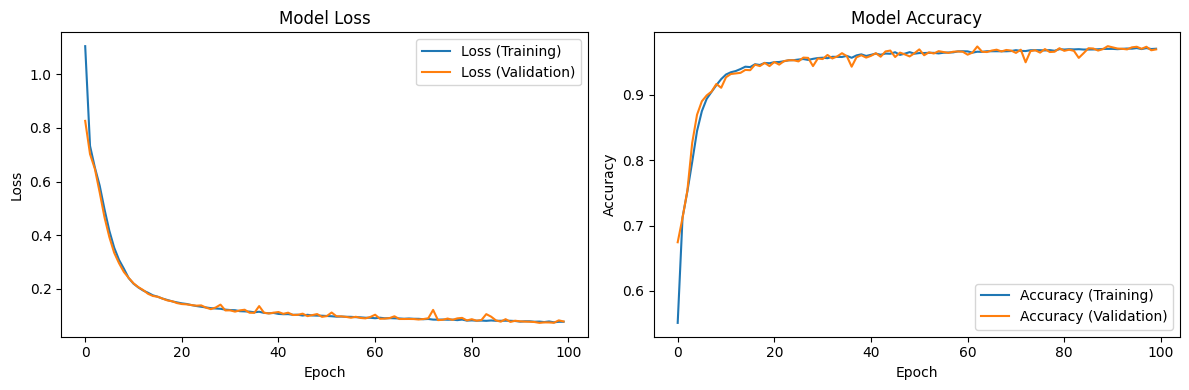

In [46]:
# Visualizing Loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss (Training)')
plt.plot(history.history['val_loss'], label='Loss (Validation)')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Visualizing Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy (Training)')
plt.plot(history.history['val_accuracy'], label='Accuracy (Validation)')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [47]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - accuracy: 0.9820 - loss: 0.0652
Test loss: 0.06888818740844727
Test accuracy: 0.9780564308166504


70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step
(2233,)
(2233,)


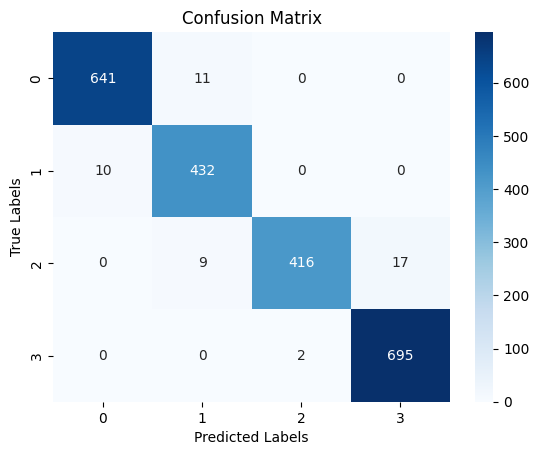

In [48]:
# Model prediction from the previous model
y_pred = model.predict(X_test)
# If the model is for multi-class classification
y_pred_binary = y_pred.argmax(axis=1)  # Get the class with the highest probability

# Check the shape of the data
print(y_pred_binary.shape)  # Should be (n_samples,)
print(y_test.shape)         # Should be (n_samples,)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [49]:
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_binary, average="macro")
recall = recall_score(y_test, y_pred_binary, average="macro")
f1 = f1_score(y_test, y_pred_binary, average="macro")

# Generate classification report
report = classification_report(y_test, y_pred_binary)

# Print the metrics report
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", report)

Precision: 0.9779325339492162
Recall: 0.9747028575239531
F1 Score: 0.9760708546646375
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       652
           1       0.96      0.98      0.97       442
           2       1.00      0.94      0.97       442
           3       0.98      1.00      0.99       697

    accuracy                           0.98      2233
   macro avg       0.98      0.97      0.98      2233
weighted avg       0.98      0.98      0.98      2233



# Save the Model

In [50]:
model.save('mlp_model.h5')

In [51]:
model.save('mlp_model.keras')

# Export the Model

In [52]:
# Load the saved model (if it's not already loaded)
model = tf.keras.models.load_model('mlp_model.h5') 

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)

converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Optional: use for size/accuracy trade-off

# Convert to TFLite format
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model successfully converted to TFLite format.")

INFO:tensorflow:Assets written to: /var/folders/4j/7vb61s2x0ld3fmx6x9s6s67m0000gn/T/tmpnlgddavc/assets


INFO:tensorflow:Assets written to: /var/folders/4j/7vb61s2x0ld3fmx6x9s6s67m0000gn/T/tmpnlgddavc/assets


Saved artifact at '/var/folders/4j/7vb61s2x0ld3fmx6x9s6s67m0000gn/T/tmpnlgddavc'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  5772156592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5772174784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5772242080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5772241904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5772290352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5772290176: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model successfully converted to TFLite format.


W0000 00:00:1733466446.637371  226152 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1733466446.637560  226152 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2024-12-06 13:27:26.638518: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/4j/7vb61s2x0ld3fmx6x9s6s67m0000gn/T/tmpnlgddavc
2024-12-06 13:27:26.638814: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2024-12-06 13:27:26.638819: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/4j/7vb61s2x0ld3fmx6x9s6s67m0000gn/T/tmpnlgddavc
2024-12-06 13:27:26.642727: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2024-12-06 13:27:26.664907: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folders/4j/7vb61s2x0ld3fmx6x9s6s67m0000gn/T/tmpnlgddavc
2024-12-06 13:27:26.670251: I tensorflow/cc/saved_model/loader.cc:

# Test the model

In [53]:
# Load the saved scaler
scaler = joblib.load('scaler.pkl')

# Load the trained model
from tensorflow.keras.models import load_model
trained_model = load_model('mlp_model.h5')

In [54]:
new_data = pd.DataFrame({
    'Umur': [60],  
    'Jenis_Kelamin': [0],
    'Tinggi_Badan': [125]  
})

new_data_scaled = scaler.transform(new_data)

predictions = trained_model.predict(new_data_scaled)

predicted_class = predictions.argmax(axis=1)[0]

classes = ['severely stunted', 'stunted', 'normal', 'tinggi']
print(f"Predicted class: {classes[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: tinggi
